![udesa](https://drive.google.com/uc?id=1ebKxcjJqpJHVZe1RXXCGxZ4GShVRBLOJ)

# 1er Parcial - Parte Computacional

##  Ejercicio 1


A continuacion, se brindan los datos **ANCHO** y **LARGO** de pétalos de la misma clase.


In [41]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
hoja_0 = df[df['target'] == 1]


# DATOS
ANCHO = hoja_0['petal width (cm)']
LARGO = hoja_0['petal length (cm)']


Realizar test de hipotesis que defina si **ANCHO** y **LARGO** son independientes.






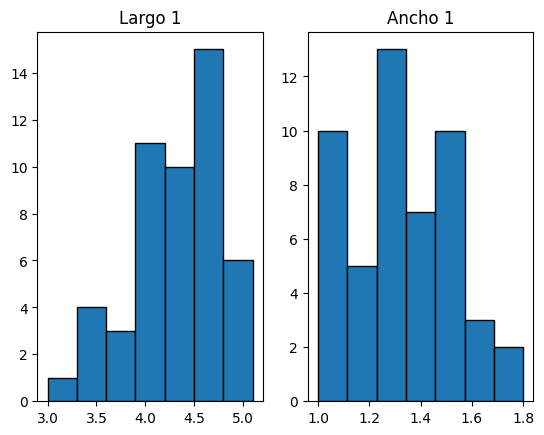

Rechazamos H0: Hay evidencia para decir que X e Y no son independientes.


In [42]:
# EJERCICIO 1: COMPLETAR

from scipy.stats import chi2
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1,2)

datos_en_los_bins_LARGO, bins_hist_LARGO,_=ax[0].hist(LARGO, bins='auto', edgecolor='black')
ax[0].set_title('Largo 1')
datos_en_los_bins_ANCHO, bins_hist_ANCHO, _ = ax[1].hist(ANCHO, bins='auto', edgecolor='black')
ax[1].set_title('Ancho 1')
plt.show()

def test_independence(H, h_X, h_Y, N_bins, M_bins, L, alpha=0.05):
    counter = 0
    for i in range(N_bins):
        for j in range(M_bins):
            if h_X[i] * h_Y[j] != 0:
                counter += ((H[i, j] - (h_X[i] * h_Y[j]) / L) ** 2) / ((h_X[i] * h_Y[j]) / L)

    chi2_threshold = chi2.ppf(alpha, (N_bins-1)*(M_bins-1))
    if counter > chi2_threshold:
        result = "Rechazamos H0: Hay evidencia para decir que X e Y no son independientes."
    else:
        result = "No rechazamos H0: No hay evidencia suficiente para decir que X e Y no son independientes."

    degrees_of_freedom = (N_bins-1)*(M_bins-1)
    return result, degrees_of_freedom, chi2_threshold

H, a, b = np.histogram2d(LARGO, ANCHO, bins=[bins_hist_LARGO, bins_hist_ANCHO])
h_X, _ = np.histogram(LARGO, bins=bins_hist_LARGO)
h_Y, _ = np.histogram(ANCHO, bins=bins_hist_ANCHO)

N_bins = len(bins_hist_LARGO) - 1
M_bins = len(bins_hist_ANCHO) - 1

L = min(len(LARGO), len(ANCHO))

result, degrees_of_freedom, chi2_threshold = test_independence(H, h_X, h_Y, N_bins, M_bins, L)

print(result)


## Ejercicio 2

Sea

$$
p(x) = \frac{2^2}{\Gamma(2)} x^{2 - 1} e^{-2x} \cdot \mathbb{I}(x \geq 0)
$$

y

$$f(x) = \mathbb{I}(x \geq 2)$$


Calcular $E_p[f]$ mediante la técnica de Importance Sampling utilizando una distribución generadora $q(x)$ debe ser $N(\mu, \sigma^2).$.

ACLARACIONES:
- La generación de números aleatorios debe ser utilizando` np.random.random(`) (no se permite cambiar parámetros).
- $p(x)$ ya es una distribución de probabilidad, no hay que normalizarla.


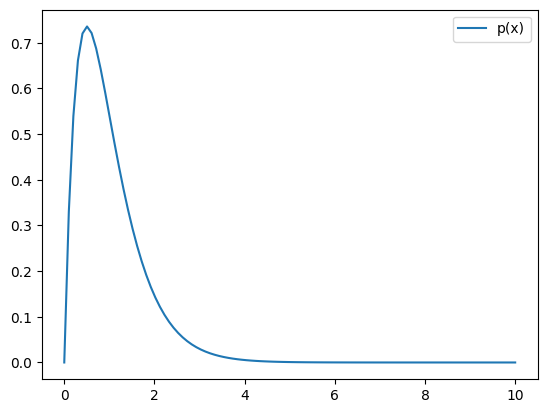

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma


def p(x):
    if x < 0:
        return 0
    return (2**2) * (x**(2 - 1)) * np.exp(-2 * x) / gamma(2)

# plot p(x)
x = np.linspace(0, 10, 100)
p_x = []
for i in x:
    p_x.append(p(i))
plt.plot(x, p_x, label='p(x)')
plt.legend()
plt.show()

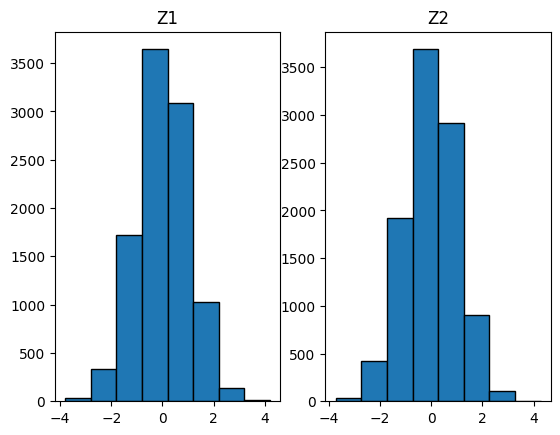

La esperanza E_p(f) es 0.0009739235748968338


In [44]:
# Ejercicio 2: Completar

def importancia(f, p, q):
    # q_values = muestrasQ(N)
    muestras = [f(q) * p(q) / q for q in q]

    return np.mean(muestras)

def generate_normal(n=1000, u1=None, u2=None):
    #generar normales a partir de las uniformes
    # z1=Rcos(theta)= np.sqrt(-2*np.log(u1)) * np.cos(2*np.pi*u2)
    # z2=Rsin(theta)= np.sqrt(-2*np.log(u1)) * np.sin(2*np.pi*u2)
    u1= [np.random.random() for _ in range(n)] if u1 is None else u1
    u2= [np.random.random() for _ in range(n)] if u2 is None else u2

    u1 = np.array(u1)
    u2 = np.array(u2)

    R= np.sqrt(-2*np.log(u1))
    theta= 2*np.pi*u2

    z1= R*np.cos(theta)
    z2= R*np.sin(theta)
    return z1, z2

N = 10000

z1,z2=generate_normal(N)
bins1=np.arange(min(z1),max(z1)+1,1)
bins2=np.arange(min(z2),max(z2)+1,1)
fig, ax = plt.subplots(1,2)
datos_en_los_bins_datos1, bins_hist_datos1,_=ax[0].hist(z1, bins=bins1, edgecolor='black')
ax[0].set_title('Z1')
datos_en_los_bins_datos2, bins_hist_datos2, _ = ax[1].hist(z2, bins=bins2, edgecolor='black')
ax[1].set_title('Z2')
plt.show()


def f(x):
    return 1 if x >= 2 else 0

e_p_f = importancia(f, p, z1)

print(f'La esperanza E_p(f) es {e_p_f}')

